<span class="badge badge-info">АНАЛИЗ БИЗНЕС-ПОКАЗАТЕЛЕЙ</span>
# Аналитика в «Яндекс.Афиши»

## Описание проекта

Для отдела маркетинговой аналитики Яндекс.Афиши, нужно помочь маркетологам **`снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.`**

**`Данные с июня 2017 по конец мая 2018 года`**: лог сервера с данными о посещениях сайта Яндекс.Афиши, выгрузка всех заказов за этот период, статистика рекламных расходов. 

**`Предстоит изучить`**: как клиенты пользуются сервисом, когда делают первые покупки на сайте, сколько денег приносит компании каждый клиент, когда расходы на привлечение клиента окупаются.

Примечание: выручка измеряется в условных единицах — у.е.

## Описание данных

**Таблица `visits` (информация о посещениях сайта Яндекс.Афиши):**

 - Device — устройство пользователя
 - End Ts — дата и время окончания сессии
 - Start Ts — дата и время начала сессии
 - Source Id — идентификатор рекламного источника
 - Uid — уникальный идентификатор пользователя
 
**Таблица `orders` (информация о заказах):**

 - Buy Ts — дата и время  оформления заказа
 - Revenue — выручка c заказа (сумма заказа)
 - Uid — уникальный идентификатор пользователя

**Таблица `costs` (информация о рекламных расходов):**

 - source_id — идентификатор рекламного источника
 - dt — дата рекламных расходов
 - costs — расходы на рекламный источник 


## Инструкция по выполнению проекта

### Шаг 1. Загрузка данных и подготовка к анализу

 - 1.1. Импорт библиотек и загрузка данных.
 - 1.2. Осмотр данных.
 - 1.3. Выводы о данных.
 - 1.4. Предобработка таблицы **visits** о посещениях сайта Яндекс.Афиши.
 - 1.5. Предобработка таблицы **orders** о заказах.
 - 1.6. Предобработка таблицы **costs** о рекламных расходах.
 - 1.7. Выводы о предобработки данных.

### Шаг 2. Расчёт метрик и строение графиков

2.1. Продуктовые метрики.
 - 2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период, а также постройте график изменения метрик во времени.
     - 2.1.1.1. Количество уникальных пользователей по устройствам.
 - 2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт. Выясните, как изменяется эта метрика с течением времени.
     - 2.1.2.1. Количество визитов на сайт в день по устройствам.
 - 2.1.3. Исследуйте, сколько времени пользователи проводят на сайте. Посчитайте среднюю продолжительность пользовательской сессии за весь период. Выясните, как продолжительность сессий распределена по пользователям.
 - 2.1.4. Рассчитайте Retention Rate, применяя когортный анализ.

2.2. Метрики электронной коммерции.
 - 2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.
 - 2.2.2. Применяя когортный анализ, рассчитайте среднее количество покупок на одного клиента за определённый период, например за 6 месяцев.
 - 2.2.3. Рассчитайте среднюю выручку с пользователя. Покажите, как меняется эта метрика с течением времени.
     - 2.2.3.1. Cредняя выручка с пользователя по устройствам.
 - 2.2.4. Выясните, как меняется во времени накопительный LTV по когортам. Сравните средний LTV по когортам за 6 месяцев.  Оценивайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

2.3. Маркетинговые метрики.
Рассчитайте и отобразите на графиках, как маркетинговые метрики отличаются по рекламным источникам.
 - 2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам и как меняется это распределение во времени.
 - 2.3.2. Рассчитайте CAC. Определите, сколько стоит привлечение одного покупателя из каждого источника трафика.
 - 2.3.3. Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт.

### Шаг 3. Общие выводы и рекомендации

---

## Шаг 1. Загрузка данных и подготовка к анализу<a name='step1'></a>

### 1.1. Импорт библиотек и загрузка данных

In [1]:
# Необходимые библиотеки для исследования.
import pandas as pd                             # для анализа данных
import numpy as np                              # для математических вычислений

import seaborn as sns                           # для визуализации данных
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline

from datetime import datetime                   # для преобразования к типу данных
from scipy import stats as st                   # для высокоуровневых математических вычислений 

import warnings                                 # для предупреждений в программе 
warnings.filterwarnings('ignore')               # фильтр предупреждений

In [2]:
# Загрузка данных.
visits = pd.read_csv('visits_log.csv')          # информация о визитах
orders = pd.read_csv('orders_log.csv')          # информация о заказах
costs = pd.read_csv('costs_log.csv')            # информация о расходах

In [3]:
# С помощью pd.set_option настроим вывод так чтобы:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)                 # текст в ячейке отражался полностью вне зависимости от длины;
pd.set_option('display.float_format', '{:.2f}'.format)      # все числа отражались с двумя знаками после запятой.

In [4]:
# Установка эстетических параметров графиков.
sns.set(style='whitegrid', palette='Pastel1', font='sans-serif', font_scale=1.2, color_codes=False, rc=None) 

### 1.2. Осмотр данных

In [5]:
# Напишем функцию для получения информации о датасетах
def info_about_dataframe(dataframe):
    display("Получение 10 случайно выбранных записей из таблицы:")
    display(dataframe.sample(10, random_state=123))
    display("Выведем статистику о датасете:")
    display(dataframe.describe())
    display(dataframe.describe(include='object'))
    display("Получение общей информации о данных в таблице:")
    dataframe.info()
    display("Количество пропущенных значений:")
    display(dataframe.isnull().sum())
    duplicates = dataframe.duplicated().sum()
    display()
    display("Количество дубликатов: {} строк".format(duplicates))              
    display("Доля дубликатов от общего количества записей: {:.1%}".format((duplicates/len(dataframe)))) 

**Рассмотрим таблицу `visits` о посещениях сайта Яндекс.Афиши.**

In [6]:
info_about_dataframe(visits) # информация о посещениях сайта Яндекс.Афиши

'Получение 10 случайно выбранных записей из таблицы:'

,Device,End Ts,Source Id,Start Ts,Uid
338046,desktop,2018-02-04 00:24:00,3,2018-02-04 00:21:00,5129785904327599060
265202,desktop,2017-07-19 06:52:00,2,2017-07-19 06:09:00,13830588879956055787
338675,touch,2017-10-18 15:05:00,1,2017-10-18 15:02:00,12993717634206165466
111992,desktop,2017-11-15 16:28:00,1,2017-11-15 16:18:00,2793222927092149879
79577,desktop,2018-03-07 14:50:00,5,2018-03-07 14:49:00,6849301804773438182
47815,desktop,2018-03-27 17:00:00,3,2018-03-27 16:57:00,11369981800172382536
140763,touch,2017-11-01 09:19:00,4,2017-11-01 09:12:00,9574016818530187982
285214,desktop,2018-04-26 16:52:00,4,2018-04-26 16:42:00,18368965538905018965
34971,desktop,2018-05-06 16:43:00,3,2018-05-06 16:41:00,1420274240730153352
185092,desktop,2018-04-27 16:20:00,1,2018-04-27 16:13:00,15283214588823731332


'Выведем статистику о датасете:'

,Source Id,Uid
count,359400.00,359400.00
mean,3.75,9202556994354921472.00
std,1.92,5298432824659611648.00
min,1.00,11863502262781.00
25%,3.00,4613406732167550976.00
50%,4.00,9227412908740601856.00
75%,5.00,13728237011236171776.00
max,10.00,18446676030785673216.00


,Device,End Ts,Start Ts
count,359400,359400,359400
unique,2,224760,224303
top,desktop,2017-11-24 16:51:00,2017-11-24 16:06:00
freq,262567,23,19


'Получение общей информации о данных в таблице:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


'Количество пропущенных значений:'

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

'Количество дубликатов: 0 строк'

'Доля дубликатов от общего количества записей: 0.0%'

Всего в таблице 359400 строк (наблюдений) и 5 столбцов, встречаются следующие типы данных: int64 (целые числа), object (строки) и uint64 (целые числа в диапазоне от 0 по 18446744073709551615, числа размером 8 байт). Пропущенных значений и дубликатов не наблюдается.

**Рассмотрим таблицу `orders` о заказах.**

In [7]:
info_about_dataframe(orders) # информация о заказах

'Получение 10 случайно выбранных записей из таблицы:'

,Buy Ts,Revenue,Uid
23894,2017-12-13 19:36:00,0.00,1149062814762747892
900,2017-06-08 00:53:00,17.11,13507729055670128212
26237,2017-12-26 17:12:00,1.31,5945723280603258886
18583,2017-11-20 18:27:00,0.73,10780884444660069286
15264,2017-10-30 10:15:00,1.34,8211180112370244213
13471,2017-10-18 20:37:00,0.06,2708739970391554716
28541,2018-01-08 17:36:00,3.67,13060175064196080366
49085,2018-05-26 17:59:00,1.53,6577192376669608644
42938,2018-04-03 15:49:00,1.83,6106209150211297108
29601,2018-01-16 11:27:00,11.00,6269310943594584676


'Выведем статистику о датасете:'

,Revenue,Uid
count,50415.00,50415.00
mean,5.00,9098160634289729536.00
std,21.82,5285741550834715648.00
min,0.00,313578113262317.00
25%,1.22,4533566627250599936.00
50%,2.50,9102273602618561536.00
75%,4.89,13682901980465401856.00
max,2633.28,18446167067214817280.00


,Buy Ts
count,50415
unique,45991
top,2018-05-31 10:13:00
freq,9


'Получение общей информации о данных в таблице:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


'Количество пропущенных значений:'

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

'Количество дубликатов: 0 строк'

'Доля дубликатов от общего количества записей: 0.0%'

Всего в таблице 50415 строк (наблюдений) и 3 столбца, встречаются следующие типы данных:  float64 (вещественные числа), object (строки) и uint64 (целые числа в диапазоне от 0 по 18446744073709551615, числа размером 8 байт). Нулевые значения в выручке. Пропущенных значений и дубликатов не наблюдается.  

**Рассмотрим таблицу `costs` о рекламных расходах.**

In [8]:
info_about_dataframe(costs) # информация о рекламных расходов

'Получение 10 случайно выбранных записей из таблицы:'

,source_id,dt,costs
613,2,2018-02-06,124.81
556,2,2017-12-11,208.46
830,3,2017-09-13,561.03
1009,3,2018-03-11,471.25
2535,10,2018-05-25,22.21
439,2,2017-08-16,88.73
2025,9,2017-12-27,24.65
222,1,2018-01-09,54.71
2317,10,2017-10-17,22.38
2134,9,2018-04-17,11.50


'Выведем статистику о датасете:'

,source_id,costs
count,2542.00,2542.00
mean,4.86,129.48
std,3.18,156.30
min,1.00,0.54
25%,2.00,21.95
50%,4.00,77.30
75%,9.00,170.06
max,10.00,1788.28


,dt
count,2542
unique,364
top,2017-10-05
freq,7


'Получение общей информации о данных в таблице:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


'Количество пропущенных значений:'

source_id    0
dt           0
costs        0
dtype: int64

'Количество дубликатов: 0 строк'

'Доля дубликатов от общего количества записей: 0.0%'

Всего в таблице 2542 строки (наблюдений) и 3 столбца, встречаются следующие типы данных: float64 (вещественные числа), int64 (целые числа) и object (строки). Пропущенных значений и дубликатов не наблюдается.

### 1.3. Выводы о данных

Наблюдаются следующие проблемы с данными:

 - названия столбцов написаны не совсем удобно;
 - варьируется регистр букв в переменных;
 - некорректные типы данных, в дате в столбцах 'End Ts', 'Start Ts', 'Buy Ts' и 'dt'.
 - нулевые значения в столбце 'Revenue', необходимо исследовать.

### 1.4. Предобработка таблицы `visits` о посещениях сайта Яндекс.Афиши

In [9]:
visits.columns # получаем перечень названий столбцов таблицы visits

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [10]:
visits.columns = visits.columns.str.lower() # приведём столбцы к нижнему регистру
visits.columns = visits.columns.str.replace(' ', '_') # замена пробелов на '_'
visits.columns.tolist() # проверка результатов

['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [11]:
visits.rename(columns={'start_ts': 'session_start_ts', 
                      'end_ts': 'session_end_ts'}, inplace=True) # переименуем столбцы для удобства дальнейшей работы
visits.columns.tolist() # проверка результатов

['device', 'session_end_ts', 'source_id', 'session_start_ts', 'uid']

In [12]:
visits = visits[['uid', 'device', 'session_start_ts', 'session_end_ts', 'source_id']] # поменяем логику столбцов на удобную
visits.columns.tolist() # проверка результатов

['uid', 'device', 'session_start_ts', 'session_end_ts', 'source_id']

In [13]:
visits['session_start_ts'] = pd.to_datetime(visits['session_start_ts'], format = '%Y-%m-%d %H:%M:%S') # замена типа данных
visits['session_end_ts'] = pd.to_datetime(visits['session_end_ts'], format = '%Y-%m-%d %H:%M:%S') # замена типа данных

Проверим данные на логику, где время начала сессии больше чем время окончания сессии, то есть 'start_ts > end_ts'.    

In [14]:
# Найдем аномалии во времени сессий. 
abnormal_session_ts = visits[(visits['session_start_ts'] > visits['session_end_ts'])]
print('Всего аномальных сессий: {} строки'.format(len(abnormal_session_ts)))
abnormal_session_ts

Всего аномальных сессий: 2 строки


,uid,device,session_start_ts,session_end_ts,source_id
4181,13092152539246794986,desktop,2018-03-25 03:50:00,2018-03-25 03:18:00,3
177972,4621202742905035453,desktop,2018-03-25 03:55:00,2018-03-25 03:09:00,9


In [15]:
# Удалим из таблицы аномальные сессии. Удаляем строки по значениям индекса.
visits = visits.drop(index=[4181, 177972]).reset_index(drop=True)

In [16]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359398 entries, 0 to 359397
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   uid               359398 non-null  uint64        
 1   device            359398 non-null  object        
 2   session_start_ts  359398 non-null  datetime64[ns]
 3   session_end_ts    359398 non-null  datetime64[ns]
 4   source_id         359398 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


### 1.5. Предобработка таблицы `orders` о заказах

In [17]:
orders.columns # получаем перечень названий столбцов таблицы orders

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [18]:
orders.columns = orders.columns.str.lower() # приведём столбцы к нижнему регистру
orders.columns = orders.columns.str.replace(' ', '_') # замена пробелов на '_'
orders.columns.tolist() # проверка результатов

['buy_ts', 'revenue', 'uid']

In [19]:
orders.rename(columns={'buy_ts': 'order_ts'}, inplace=True) # переименуем столбец для удобства дальнейшей работы
orders.columns.tolist() # проверка результатов

['order_ts', 'revenue', 'uid']

In [20]:
orders = orders[['uid', 'order_ts', 'revenue']] # поменяем логику столбцов на более удобную
orders.columns.tolist() # проверка результатов

['uid', 'order_ts', 'revenue']

In [21]:
orders['order_ts'] = pd.to_datetime(orders['order_ts'], format = '%Y-%m-%d %H:%M:%S') # заменим тип данных на datetime

Проверим данные на логику, где в логах с покупками есть 'revenue <= 0'.

In [22]:
revenue_zero_values = orders[orders['revenue'] <= 0]['revenue'].count() # кол-во нулевых значений в столбце 'revenue'
proportion_zero_values = orders[orders['revenue'] <= 0]['revenue'].count() / len(orders) # доля нулевых значений 

print('Количество строк с нулевым значением: {} строк'.format(revenue_zero_values))
print('Доля нулевых значений от общего количества записей: {:.2%}'.format(proportion_zero_values))

Количество строк с нулевым значением: 51 строк
Доля нулевых значений от общего количества записей: 0.10%


Доля нулевых значений очень маленькая, так как их количество не превышает 1% от общего количества строк, приняла решение удалить  строки с нулевыми значениями, что в свою очередь никак не повлияет на дальнейший анализ. Для удаления строк с нулевыми значениями воспользуюсь фитрацией с помощью метода query().

In [23]:
orders = orders.query('revenue > 0')  # избавление от строк с нулевым значением в столбце 'revenue'

In [24]:
orders.describe() # выведем статистику о датасете методом describe()

,uid,revenue
count,50364.00,50364.00
mean,9101256443275660288.00,5.00
std,5285808037342397440.00,21.83
min,313578113262317.00,0.01
25%,4538636801516467200.00,1.22
50%,9103966622588051456.00,2.50
75%,13684634793868875776.00,4.89
max,18446167067214817280.00,2633.28


In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50364 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   uid       50364 non-null  uint64        
 1   order_ts  50364 non-null  datetime64[ns]
 2   revenue   50364 non-null  float64       
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


### 1.6. Предобработка таблицы `costs` о рекламных расходах

In [26]:
costs.columns # получаем перечень названий столбцов таблицы costs

Index(['source_id', 'dt', 'costs'], dtype='object')

In [27]:
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d %H:%M:%S') # заменим тип данных

In [28]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### 1.7. Выводы о предобработки данных

На этапе предобработки данных обнаружились проблемы с названиями столбцов, а также некорректный тип в данных. Были приняты следующие решения:

В таблице `visits` о посещениях сайта Яндекс.Афиши:
 - привели столбцы к нижнему регистру и заменили пробелы на нижнее подчеркивание '_';
 - привели даты в столбцах 'end_ts' и 'start_ts' к соответствующим форматам, к типу datetime;
 - поменяли логику столбцов на более удобную;
 - убрали аномальные сессии, где 'start_ts > end_ts'.
 
В таблице `orders` о заказах:
 - также, привели столбцы к нижнему регистру и заменили пробелы на нижнее подчеркивание '_';
 - заменили тип данных на datetime в 'buy_ts';
 - поменяли логику столбцов на более удобную;
 - убрали нулевые значения в столбце 'revenue', это не повлияет на дальнейший анализ.

В таблице `costs` о рекламных расходах:
 - привели даты в столбце 'dt' к типу datetime.
 
Названия столбцов и их тип данных теперь корректны и удобны для дальнейшей работы. Их исправление позволит провести анализ точнее.

## Шаг 2. Расчет метрик и строение графиков

### 2.1. Продуктовые метрики<a name='step21'></a>

#### 2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период, а также постройте график изменения метрик во времени;

На активных пользователей смотрят в трёх измерениях:
 - DAU (от англ. daily active users) — количество уникальных пользователей в день;
 - WAU (от англ. weekly active users) — количество уникальных пользователей в неделю;
 - MAU (от англ. monthly active users) — количество уникальных пользователей в месяц.
 
Есть информация об uid пользователя, времени начала и окончания сессии. Данные с июня 2017 по конец мая 2018 года.
Чтобы вычислить средние значения метрик за весь период, для начала выделим в отдельные столбцы неделю, месяц и год, а также полную дату. Затем посчитаем метрики DAU, WAU и MAU. Сгруппируем данные по уникальным пользователям и найдём среднее. Затем построим графики по изменению метрик во времени.

In [29]:
# Выделим в отдельные столбцы день, неделю, месяц и год, а также полную дату.
visits['session_week'] = visits['session_start_ts'].dt.week
visits['session_month'] = visits['session_start_ts'].dt.month
visits['session_year'] = visits['session_start_ts'].dt.year
visits['session_date'] = visits['session_start_ts'].dt.date

In [30]:
# Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее.
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print('Среднее кол-во уникальных пользователей за день: {} человек'.format(int(dau)))
print('Среднее кол-во уникальных пользователей за неделю: {} человек'.format(int(wau)))
print('Среднее кол-во уникальных пользователей за месяц: {} человек'.format(int(mau)))

Среднее кол-во уникальных пользователей за день: 907 человек
Среднее кол-во уникальных пользователей за неделю: 5716 человек
Среднее кол-во уникальных пользователей за месяц: 23228 человек


In [31]:
# Также можно посчитать регулярность пользования сайта, используя метрику — sticky factor (англ. «липкий фактор»).
sticky_wau = dau / wau
sticky_mau = dau / mau
print('Недельная аудитория: {:.2%}'.format(sticky_wau[0]))
print('Месячная аудитория: {:.2%}'.format(sticky_mau[0]))

Недельная аудитория: 15.88%
Месячная аудитория: 3.91%


По результатам показатели невысокие, очевидно, что к сервису обращаются нечасто.

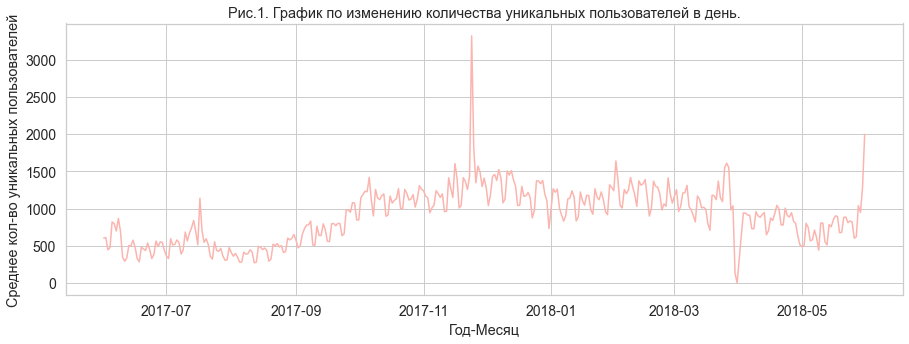

In [32]:
# График по изменению DAU во времени.
visits.groupby('session_date').agg({'uid': 'nunique'}) \
      .plot(figsize=(15,5), grid=True, legend=False, 
            title='Рис.1. График по изменению количества уникальных пользователей в день.', fontsize=14) # alpha=0.5 
plt.xlabel('Год-Месяц')
plt.ylabel('Среднее кол-во уникальных пользователей')
plt.show()

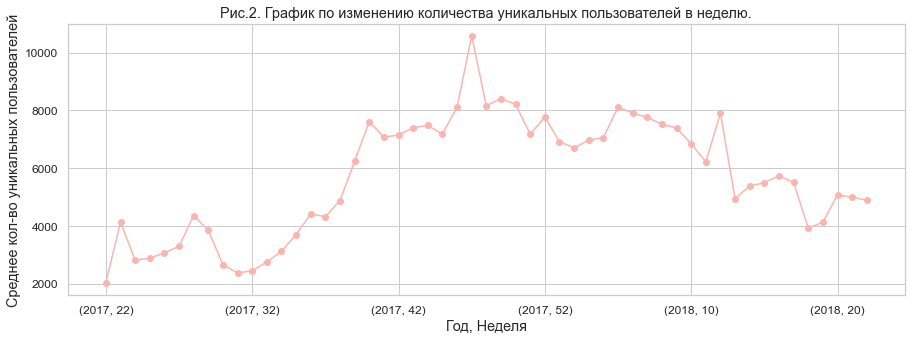

In [33]:
# График по изменению WAU во времени.
visits.groupby(['session_year', 'session_week']) \
      .agg({'uid': 'nunique'}) \
      .plot(marker='o', figsize=(15,5), grid=True, legend=False, 
            title='Рис.2. График по изменению количества уникальных пользователей в неделю.', fontsize=12)
plt.xlabel('Год, Неделя')
plt.ylabel('Среднее кол-во уникальных пользователей')
plt.show()

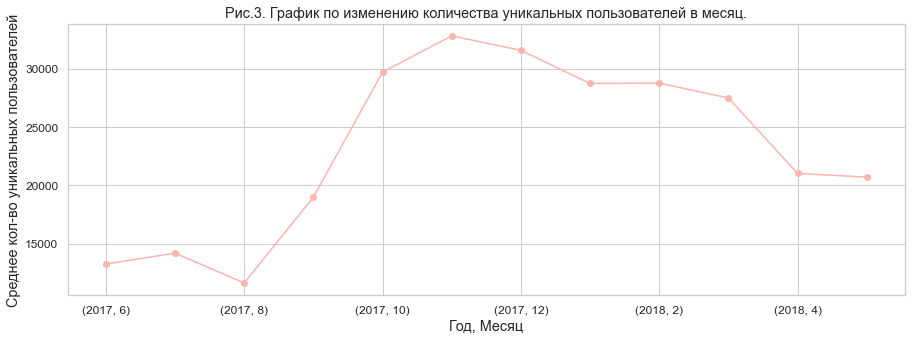

In [34]:
# График по изменению MAU во времени.
visits.groupby(['session_year', 'session_month']) \
      .agg({'uid': 'nunique'}) \
      .plot(marker='o', figsize=(15,5), grid=True, legend=False, 
            title='Рис.3. График по изменению количества уникальных пользователей в месяц.', fontsize=12)
plt.xlabel('Год, Месяц')
plt.ylabel('Среднее кол-во уникальных пользователей')
plt.show()

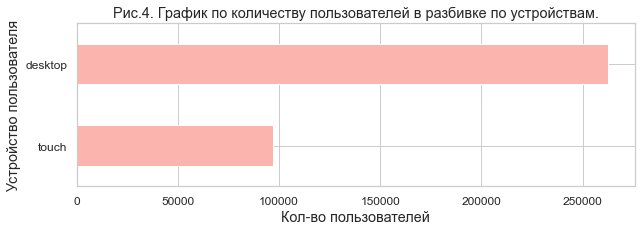

In [35]:
# График по количеству визитов в зависимости от устройства пользователя.
visits.groupby('device').agg({'uid': 'count'})\
      .sort_values('device', ascending = False)\
      .plot(kind='barh', figsize=(10,3), grid=True, legend=False,
            title='Рис.4. График по количеству пользователей в разбивке по устройствам.', fontsize=12)
plt.xlabel('Кол-во пользователей')
plt.ylabel('Устройство пользователя')
plt.show()

#### Выводы

По полученным результатам:
 - DAU = 907 человек
 - WAU = 5716 человек
 - MAU = 23228 человек

Среднее кол-во уникальных пользователей за месяц 23228 человек, это хорошая цифра, однако по метрики "sticky factor" (липкому фактору) показатели невысокие, очевидно, что к сервису обращаются нечасто.

Исходя из полученных графиков, с августа месяца по ноябрь виден рост активности пользователей. Пик приходится на 24 ноября 2017 года. Заметно снижение активности с конца ноября до конца мая 2018 года. Наблюдается сезонность, активность пользователей зависит от времени года.

Так же нужно отметить, что пользователи заходят на сайт с устройства desktop больше, чем с touch устройства. 

#### 2.1.1.1. Количество уникальных пользователей по устройствам;

In [36]:
# Количество пользователей в день по устройствам.
dau_per_device = visits.groupby(['device', 'session_date']).agg({'uid': 'nunique'}).reset_index()
dau_per_device = dau_per_device.pivot_table(index='session_date', columns='device', values='uid')

# Количество пользователей в неделю по устройствам.
wau_per_device = visits.groupby(['device', 'session_year', 'session_week']).agg({'uid': 'nunique'})
wau_per_device = wau_per_device.pivot_table(index='session_week', columns='device', values='uid')

# Количество пользователей в месяц по устройствам.
mau_per_device = visits.groupby(['device', 'session_year', 'session_month']).agg({'uid': 'nunique'})
mau_per_device = mau_per_device.pivot_table(index='session_month', columns='device', values='uid')

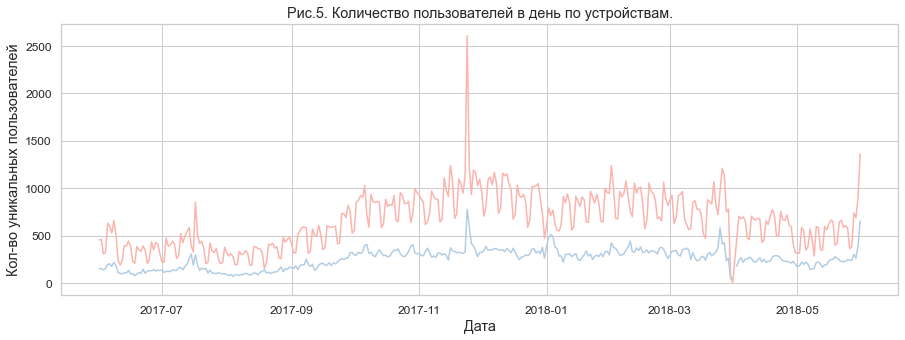

In [37]:
# График по изменению DAU по устройствам во времени.
dau_per_device.plot(figsize=(15,5), grid=True, legend=False, fontsize=12,
                    title='Рис.5. Количество пользователей в день по устройствам.') # alpha=0.5
plt.xlabel('Дата')
plt.ylabel('Кол-во уникальных пользователей')
plt.show()

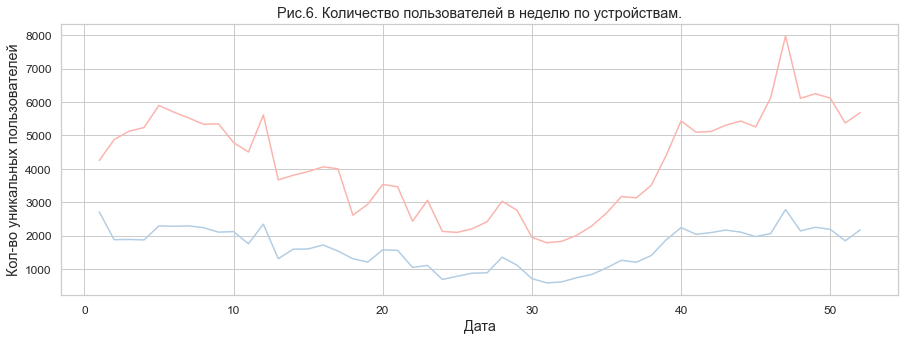

In [38]:
# График по изменению WAU по устройствам во времени.
wau_per_device.plot(figsize=(15,5), grid=True, legend=False, fontsize=12,
                    title='Рис.6. Количество пользователей в неделю по устройствам.')
plt.xlabel('Дата')
plt.ylabel('Кол-во уникальных пользователей')
plt.show()

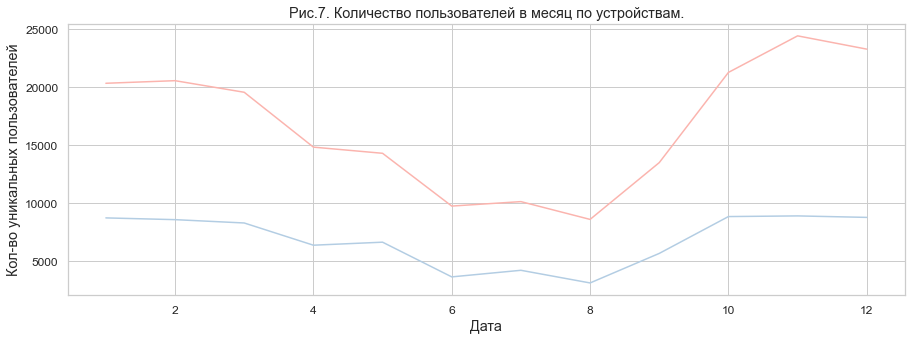

In [39]:
# График по изменению MAU по устройствам во времени.
mau_per_device.plot(figsize=(15,5), grid=True, legend=False, fontsize=12,
                    title='Рис.7. Количество пользователей в месяц по устройствам.')
plt.xlabel('Дата')
plt.ylabel('Кол-во уникальных пользователей')
plt.show()

In [40]:
# Подсчет средних значений.
print('Среднее кол-во уникальных пользователей для desktop в день: {} человек'.format(int(dau_per_device['desktop'].mean())))
print('Среднее кол-во уникальных пользователей для desktop в неделю: {} человек'.format(int(wau_per_device['desktop'].mean())))
print('Среднее кол-во уникальных пользователей для desktop в месяц: {} человек'.format(int(mau_per_device['desktop'].mean())))

Среднее кол-во уникальных пользователей для desktop в день: 659 человек
Среднее кол-во уникальных пользователей для desktop в неделю: 4162 человек
Среднее кол-во уникальных пользователей для desktop в месяц: 16724 человек


In [41]:
print('Среднее кол-воу никальных пользователей для touch в день: {} человек'.format(int(dau_per_device['touch'].mean())))
print('Среднее кол-во уникальных пользователей для touch в неделю: {} человек'.format(int(wau_per_device['touch'].mean())))
print('Среднее кол-во уникальных пользователей для touch в месяц: {} человек'.format(int(mau_per_device['touch'].mean())))

Среднее кол-воу никальных пользователей для touch в день: 252 человек
Среднее кол-во уникальных пользователей для touch в неделю: 1646 человек
Среднее кол-во уникальных пользователей для touch в месяц: 6825 человек


#### Выводы

Судя по графикам, с устройства desktop заходят чаще чем с устройства touch, почти в три раза. Возможно это связано с удобствами данного устройства для совершения заказов. Необходимо изучить удобство использования сервиса на touch устройствах, что с ним не так.

#### 2.1.2. Определите сколько раз за день пользователи в среднем заходят на сайт. Выясните как изменяется эта метрика с течением времени;

Среднее количество визитов на пользователя в день: 1 раз


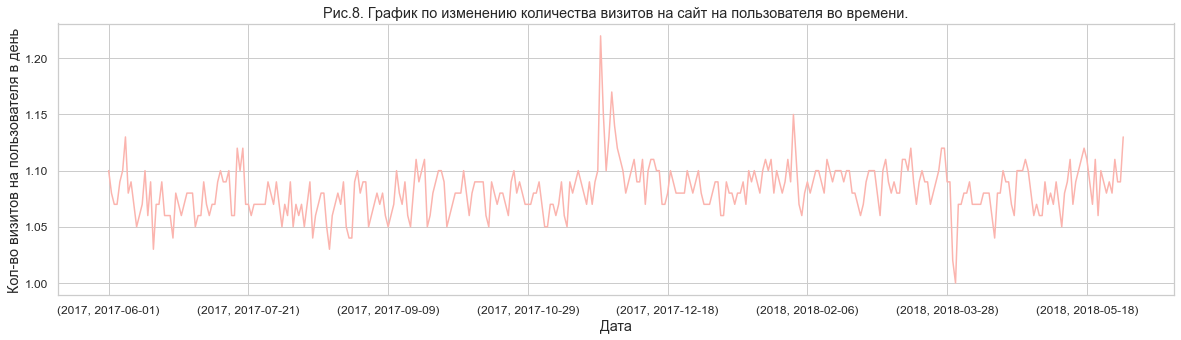

In [42]:
# Посчитаем количество визитов на пользователя и то как этот показатель изменяется во времени.
visits_per_user = visits.groupby(['session_year', 'session_date']).agg({'uid': ['count','nunique']})
visits_per_user.columns = ['n_sessions', 'n_users']
visits_per_user['sessions_per_user'] = (visits_per_user['n_sessions'] / visits_per_user['n_users']).round(2)

# График по изменению количества визитов на пользователя на сайт во времени.
visits_per_user['sessions_per_user'].plot(figsize=(20,5), grid=True, legend=False, 
                                title='Рис.8. График по изменению количества визитов на сайт на пользователя во времени.', 
                                fontsize=12)
plt.xlabel('Дата')
plt.ylabel('Кол-во визитов на пользователя в день')

sessions_per_user = visits_per_user['sessions_per_user'].mean()
print('Среднее количество визитов на пользователя в день: {} раз'.format(int(sessions_per_user)))

In [43]:
# Посчитаем сколько раз за день пользователи в среднем заходят на сайт.
visits_per_day = visits.groupby('session_date').agg({'uid': 'count'}).mean()
print('Среднее количество визитов на сайт в день: {} раз'.format(int(visits_per_day)))

Среднее количество визитов на сайт в день: 987 раз


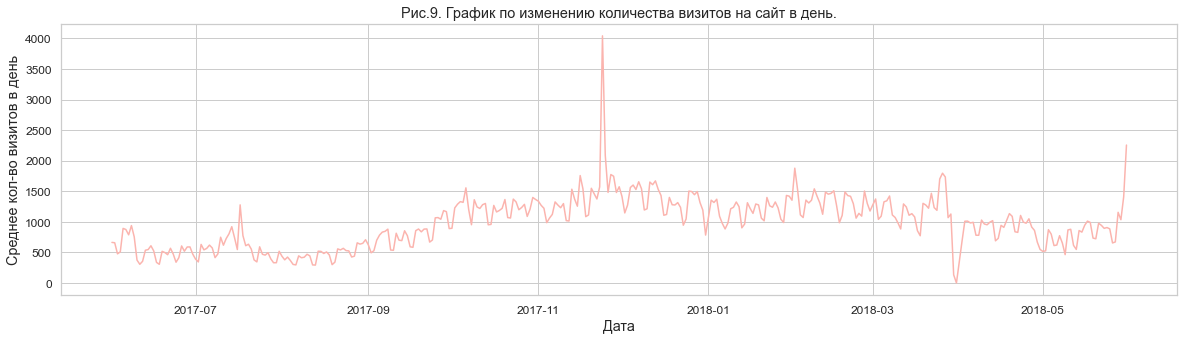

In [44]:
# График по изменению количества визитов на сайт в день во времени.
visits.groupby('session_date').agg({'uid': 'count'}) \
      .plot(figsize=(20,5), grid=True, legend=False, 
            title='Рис.9. График по изменению количества визитов на сайт в день.', fontsize=12)
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во визитов в день')
plt.show()

#### Выводы

В среднем пользователи посещают сайт 987 раз за день, и, судя по графику, количество визитов на сайт в день возрастает с августа по ноябрь, далее идет спад. 

#### 2.1.2.1. Количество визитов на сайт в день по устройствам;

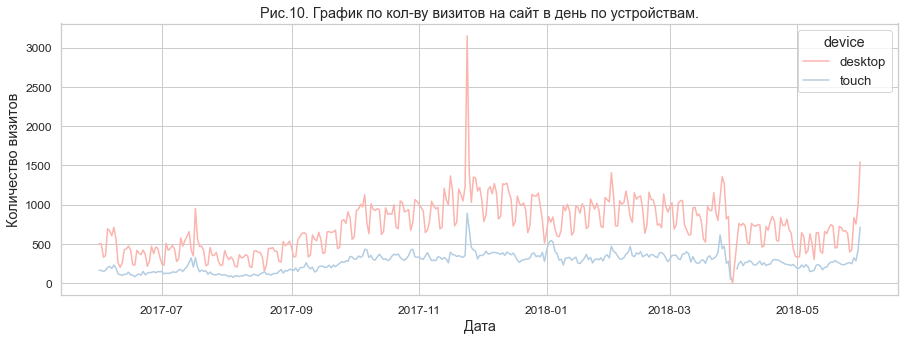

In [45]:
# Посчитаем количество визитов в день по устройствам.
visits_per_device = visits.groupby(['device', 'session_year', 'session_date']).agg({'uid': ['count','nunique']})
visits_per_device.columns = ['n_sessions', 'n_users']
visits_per_device['sessions_per_user'] = visits_per_device['n_sessions'] / visits_per_device['n_users']

# Посчитаем среднее значение по устройствам.
visits_per_device_mean = visits_per_device.groupby('device').agg({'sessions_per_user':'mean'})
visits_per_device_mean = visits_per_device_mean.reset_index()

visits_per_device = visits_per_device.pivot_table(index='session_date', columns='device', values='n_sessions')

# График по количеству визитов на сайт на пользователя по устройствам.
visits_per_device.plot(figsize=(15, 5), fontsize=12, grid=True, legend=True, 
                       title='Рис.10. График по кол-ву визитов на сайт в день по устройствам.')
plt.xlabel('Дата')
plt.ylabel('Количество визитов')
plt.show()

In [46]:
# Среднее количество визитов на одного пользователя в день.
print('Для устройства desktop: {:.2f}'.format(visits_per_device_mean['sessions_per_user'][0]))
print('Для устройства touch: {:.2f}'.format(visits_per_device_mean['sessions_per_user'][1]))

Для устройства desktop: 1.09
Для устройства touch: 1.05


#### Выводы

Судя по графикам,  среднее количество визитов на пользователя на сайт в день составляет 1,09 сессий для Desktop устройств и 1,05 сессий для Touch.

#### 2.1.3. Исследуйте сколько времени пользователи проводят на сайте. Посчитайте среднюю продолжительность пользовательской сессии за весь период. Выясните, как продолжительность сессий распределена по пользователям;

Средняя продолжительность сессии или ASL (англ. average session length) показывает, сколько длится
сессия пользователя в среднем. Посчитаем её за весь период и выясним как она распределена по пользователям.

In [47]:
# Найдём ASL — посчитаем длину всех сессий и вычислим среднее:
visits['session_duration_sec'] = (visits['session_end_ts'] - visits['session_start_ts']).dt.seconds
asl = visits['session_duration_sec'].mode()
print('Средняя продолжительность сессии: {} секунд'.format(int(asl)))

Средняя продолжительность сессии: 60 секунд


In [48]:
visits['session_duration_sec'].describe() # выведем статистику о датасете методом describe()

count   359398.00
mean       643.04
std        997.11
min          0.00
25%        120.00
50%        300.00
75%        840.00
max      42660.00
Name: session_duration_sec, dtype: float64

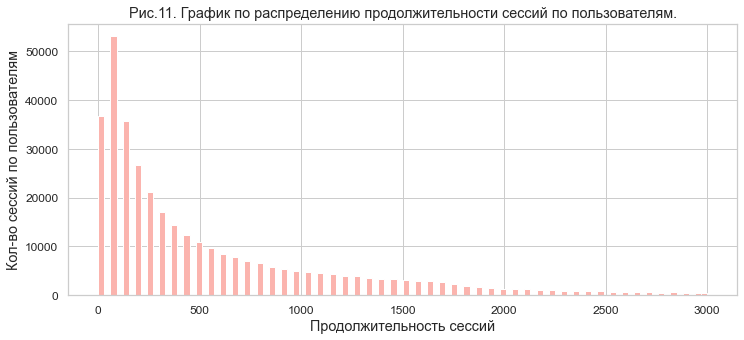

In [49]:
visits['session_duration_sec'].plot(kind = 'hist', bins=100, range=(0,3000), figsize=(12,5), grid=True, legend=False, 
            title='Рис.11. График по распределению продолжительности сессий по пользователям.', fontsize=12)
plt.xlabel('Продолжительность сессий')
plt.ylabel('Кол-во сессий по пользователям') 
plt.show()

#### Выводы

Сессия длится в среднем 60 секунд. Если пользователь успевает за это время сделать заказ, то всё хорошо, а если нет — нужно проверить, что не так. 

Статистические показатели по длительности одной сессии:
 - Среднее значение - 10 минут (643,51/60)
 - Медиана - 5 минут (300/60)
 - Мода - 1 минута (60/60)
 
Возможно в наборе данных есть серьёзные аномалии или выбросы, так как стандартное отклонение больше среднего значения, и очень странным кажется сессии в 0 секунд, возможно, что сессия длительностью меньше одной минуты записывается как ноль.

Судя по графику, распределение данных нормальное.

#### 2.1.4. Рассчитайте Retention Rate, применяя когортный анализ.

Когортный анализ применяют для анализа поведения пользователей в цифровых продуктах. Retention Rate (англ. «коэффициент удержания») показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

Retention Rate (%) = (Количество активных пользоватилей на n − ый lifetime / Количество активных пользоватилей на 0 lifetime) ∗ 100 %

  - где, lifetime (англ. «время жизни») метрика для каждого события которая отображает, в каком по счёту месяце от месяца когорты произошло данное событие.

Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь впервые проявил активность на сайте.

In [50]:
# Данные запишем в объект Series first_session_ts. Объединим его с исходным датафреймом visits.
# Сгруппируем данные по столбцу 'uid' методом groupby(). 
# Для каждого пользователя получим дату его первого визита, первой сессии.
first_session_ts = visits.groupby(['uid'])['session_start_ts'].min()
first_session_ts.name = 'first_session_ts' # обращаемся к атрибуту name Series в переменной first_session_ts

# Методом join() объединим датафрейм visits и Series first_session_ts по столбцу 'uid'.
visits = visits.join(first_session_ts, on='uid') 
visits.head()

,uid,device,session_start_ts,session_end_ts,source_id,session_week,session_month,session_year,session_date,session_duration_sec,first_session_ts
0,16879256277535980062,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,4,51,12,2017,2017-12-20,1080,2017-12-20 17:20:00
1,104060357244891740,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2,8,2,2018,2018-02-19,1680,2018-02-19 16:53:00
2,7459035603376831527,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,5,26,7,2017,2017-07-01,0,2017-07-01 01:54:00
3,16174680259334210214,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,9,20,5,2018,2018-05-20,1440,2018-03-09 20:05:00
4,9969694820036681168,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,3,52,12,2017,2017-12-27,0,2017-12-27 14:06:00


In [51]:
# Следующим шагом вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[M]'. 
# [M] в типе datetime64 означает размерность временной метки, в этом случае — месяц.
visits['first_session_month'] = visits['first_session_ts'].astype('datetime64[M]')
visits['session_month'] = visits['session_date'].astype('datetime64[M]')

In [52]:
# Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты. 
# Получим столбец cohort_lifetime с типом timedelta (от англ. time delta — «дельта времени, перепад во времени»). 
# Он хранит в себе разницу между двумя датами.
visits['cohort_lifetime'] = visits['session_month'] - visits['first_session_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

# Оставим в обозначении когорты только год и месяц. 
# Применим метод dt.strftime() — он превращает объект Series с типом datetime в строку в формате даты. 
visits['first_session_month'] = visits['first_session_month'].dt.strftime('%Y-%m')

In [53]:
# Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей 
# на определённый «месяц жизни»:
cohorts = visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

,first_session_month,cohort_lifetime,uid
0,2017-06,0,13259
1,2017-06,1,1043
2,2017-06,2,713
3,2017-06,3,814
4,2017-06,4,909
...,...,...,...
73,2018-03,1,861
74,2018-03,2,557
75,2018-04,0,15709
76,2018-04,1,760


Чтобы найти `Retention Rate`, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждом следующем месяце.

In [54]:
# Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_users_count.head()

,first_session_month,uid
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977


In [55]:
# Переименуем столбец uid в cohort_users методом rename().
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
initial_users_count

,first_session_month,cohort_users
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


In [56]:
# Объединим данные по когортам с исходным количеством пользователей в когорте.
cohorts = cohorts.merge(initial_users_count, on='first_session_month')
cohorts.head()

,first_session_month,cohort_lifetime,uid,cohort_users
0,2017-06,0,13259,13259
1,2017-06,1,1043,13259
2,2017-06,2,713,13259
3,2017-06,3,814,13259
4,2017-06,4,909,13259


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,1.00,0.08,0.05,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.04,0.04
2017-07,1.00,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.04,0.03,0.03,nan
2017-08,1.00,0.08,0.06,0.06,0.05,0.04,0.04,0.04,0.03,0.03,nan,nan
2017-09,1.00,0.09,0.07,0.05,0.04,0.04,0.04,0.02,0.02,nan,nan,nan
2017-10,1.00,0.08,0.05,0.04,0.03,0.03,0.02,0.02,nan,nan,nan,nan
2017-11,1.00,0.08,0.04,0.04,0.03,0.02,0.02,nan,nan,nan,nan,nan
2017-12,1.00,0.06,0.04,0.03,0.02,0.02,nan,nan,nan,nan,nan,nan
2018-01,1.00,0.06,0.04,0.02,0.02,nan,nan,nan,nan,nan,nan,nan
2018-02,1.00,0.06,0.03,0.02,nan,nan,nan,nan,nan,nan,nan,nan


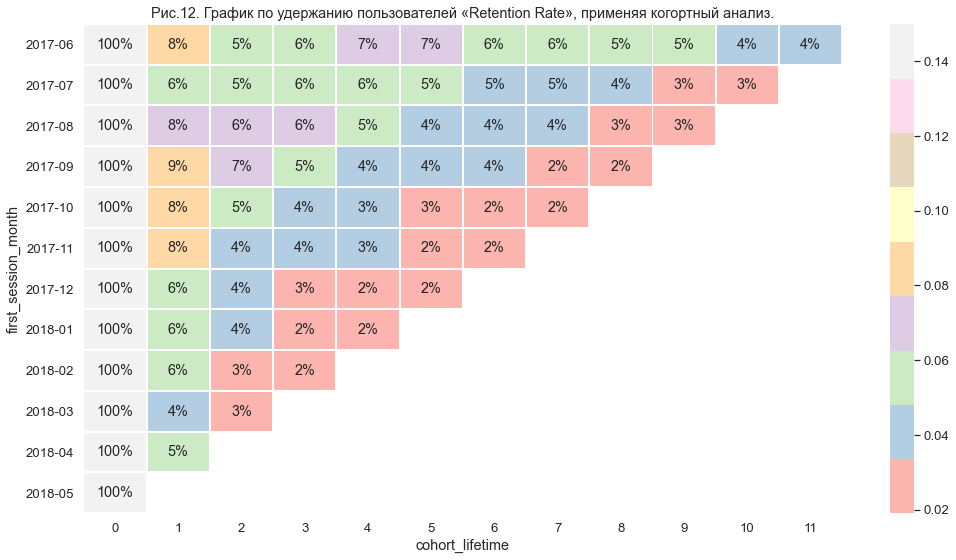

In [57]:
# Рассчитаем Retention Rate. 
# Разделим количество активных пользователей в каждую из месяцев на исходное число пользователей в когорте.
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 

# Построим сводную таблицу и создадим тепловую карту.
retention_pivot = cohorts.pivot_table(index='first_session_month', 
                                      columns='cohort_lifetime', 
                                      values='retention', 
                                      aggfunc='sum')

# Построим тепловую карту Seaborn. 
plt.figure(figsize=(17, 9))
plt.title('Рис.12. График по удержанию пользователей «Retention Rate», применяя когортный анализ.')
sns.heatmap(retention_pivot, annot=True, fmt='.0%', linewidths=1, linecolor='white', cmap='Pastel1', vmax=0.15)
retention_pivot

#### Выводы

Надо отметить, что показатели коэффициента удержания очень низкие. Retention Rate на второй месяц падает больше чем на 90% для каждой когорты убывает с течением времени.

Самый высокий процент удержания - у сентябрьской когорты, также в ноябре для всех когорт наблюдается небольшое повышение процента вернувшихся пользователей, но в основном пользователи возвращаются редко.

Если для когорты пользователей, пришедших в июне 2017 года, Retention Rate в первый месяц составляет 8%, то для пользователей, пришедших в декабре 2017 года — уже 6%. Так за 6 месяцев коэффициент удержания упал на 2%. Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.

У пользователей необходимо формировать привычку, чтобы сервис стал частью ежедневной рутины. Действия пользователей должны происходить достаточно часто и результат действия должен приносить удовлетворение.

### 2.2. Метрики электронной коммерции

#### 2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;

In [58]:
# Построим таблицу с визитами.
visits.head()

,uid,device,session_start_ts,session_end_ts,source_id,session_week,session_month,session_year,session_date,session_duration_sec,first_session_ts,first_session_month,cohort_lifetime
0,16879256277535980062,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,4,51,2017-12-01,2017,2017-12-20,1080,2017-12-20 17:20:00,2017-12,0
1,104060357244891740,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2,8,2018-02-01,2018,2018-02-19,1680,2018-02-19 16:53:00,2018-02,0
2,7459035603376831527,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,5,26,2017-07-01,2017,2017-07-01,0,2017-07-01 01:54:00,2017-07,0
3,16174680259334210214,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,9,20,2018-05-01,2018,2018-05-20,1440,2018-03-09 20:05:00,2018-03,2
4,9969694820036681168,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,3,52,2017-12-01,2017,2017-12-27,0,2017-12-27 14:06:00,2017-12,0


In [59]:
# Построим таблицу с заказами.
orders.head()

,uid,order_ts,revenue
0,10329302124590727494,2017-06-01 00:10:00,17.00
1,11627257723692907447,2017-06-01 00:25:00,0.55
2,17903680561304213844,2017-06-01 00:27:00,0.37
3,16109239769442553005,2017-06-01 00:29:00,0.55
4,14200605875248379450,2017-06-01 07:58:00,0.37


In [60]:
# Добавим в таблицу orders столбец first_session_ts, когда пользователь впервые проявил активность на сайте. 
first_visits = visits[['uid','first_session_ts']]
orders = orders.merge(first_visits, on='uid')
orders.head()

,uid,order_ts,revenue,first_session_ts
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:09:00
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:14:00
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:25:00
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:14:00
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:31:00


In [61]:
# Необходимо установить наличие дубликатов. Если найдутся, удаляем, и проверяем, все ли удалились.
orders.duplicated().sum() # проверка на отсутствие дубликатов

709419

In [62]:
# Удаление всех дубликатов из таблицы orders.
orders = orders.drop_duplicates().reset_index(drop=True)

In [63]:
# Проверка на отсутствие.
orders.duplicated().sum()

0

In [64]:
# Зная даты заказов, можно получить и самую раннюю. Сгруппируем данные по столбцу 'uid' методом groupby(). 
# Для каждого пользователя получим дату его первого заказа.
first_order_ts = orders.groupby('uid')['order_ts'].min() 
first_order_ts.name = 'first_order_ts'

# Методом merge() объединим датафрейм orders и Series first_order_ts по столбцу 'uid':
orders = orders.merge(first_order_ts, on='uid', how='inner')
orders.head()

,uid,order_ts,revenue,first_session_ts,first_order_ts
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:09:00,2017-06-01 00:10:00
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:14:00,2017-06-01 00:25:00
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:25:00,2017-06-01 00:27:00
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:14:00,2017-06-01 00:29:00
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:31:00,2017-06-01 07:58:00


In [65]:
# Создадим новый датафрейм где оставим только нужные нам столбцы, а затем удалим дубликаты.
new_orders = orders[['uid','first_session_ts','first_order_ts']]

In [66]:
new_orders.duplicated().sum() # проверка на отсутствие дубликатов

13855

In [67]:
# Удаление всех дубликатов из таблицы new_orders.
new_orders = new_orders.drop_duplicates().reset_index(drop=True)

In [68]:
new_orders.duplicated().sum() # проверка на отсутствие дубликатов

0

In [69]:
# Найдем время, с момента первого посещения сайта до совершения покупки.
new_orders['order_time_sec'] = (new_orders['first_order_ts'] - new_orders['first_session_ts']).dt.seconds
new_orders.head()

,uid,first_session_ts,first_order_ts,order_time_sec
0,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,60
1,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,660
2,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,120
3,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,900
4,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,1620


In [70]:
new_orders['order_time_sec'].describe() # выведем статистику о датасете методом describe()

count   36509.00
mean    14952.99
std     25786.25
min         0.00
25%       240.00
50%       960.00
75%     15120.00
max     86340.00
Name: order_time_sec, dtype: float64

In [71]:
new_orders['order_time_sec'].mode() # найдем моду

0    60
dtype: int64

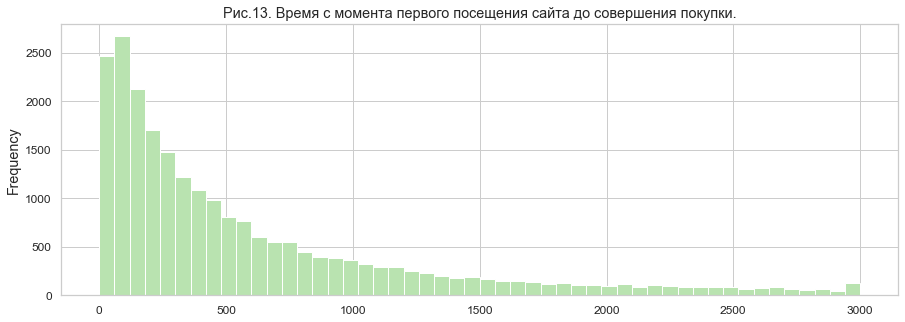

In [72]:
new_orders['order_time_sec'].plot(kind='hist', bins = 50, range = (0, 3000), figsize=(15,5), grid=True, legend=False, 
                                  title='Рис.13. Bремя с момента первого посещения сайта до совершения покупки.', 
                                  fontsize=12, color='#b9e3b0')
plt.show()

#### Выводы

Исходя из полученных результатов с момента первого посещения сайта до совершения покупки проходит:
 - В среднем: 4 часа ((14949/60)/60)
 - Медиана: 16 минут (960/60)
 - Мода: 1 минута 

Можно сказать, что большинство заказов совершаются в первые минуты от начала первой сессии. 50 % первых заказов совершаются в течение 16 минут и 75% в течение 4 часов от начала первой сессии.

#### 2.2.2. Применяя когортный анализ, рассчитайте среднее количество покупок на одного клиента за определённый период, например за 6 месяцев;

In [73]:
# Построим таблицу с заказами.
orders.head()

,uid,order_ts,revenue,first_session_ts,first_order_ts
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:09:00,2017-06-01 00:10:00
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:14:00,2017-06-01 00:25:00
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:25:00,2017-06-01 00:27:00
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:14:00,2017-06-01 00:29:00
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:31:00,2017-06-01 07:58:00


In [74]:
# Следующим шагом выделим из столбцов first_order_ts, и order_ts месяцы. Вызовем метод astype(): 
# преобразуем значения столбцов к типу 'datetime64[M]', что означает размерность временной метки, в этом случае — месяц.
orders['first_session_month'] = orders['first_session_ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_ts'].astype('datetime64[M]')
orders['order_month'] = orders['order_ts'].astype('datetime64[M]')
orders.head()

,uid,order_ts,revenue,first_session_ts,first_order_ts,first_session_month,first_order_month,order_month
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:09:00,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:14:00,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:25:00,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:14:00,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:31:00,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01


In [75]:
# Теперь посчитаем lifetime заказов в рамках когорты.
orders['cohort_lifetime'] = orders['order_month'] - orders['first_order_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

In [76]:
# Cгруппируем заказы по когортам и lifetime, и высчитаем кол-во покупок.
orders_grouped_by_cohorts = orders.groupby(['first_order_month', 'cohort_lifetime']) \
                                  .agg({'uid':['count', 'nunique']}).reset_index()
orders_grouped_by_cohorts.columns = ['first_order_month', 'cohort_lifetime', 'n_orders', 'n_users']
orders_grouped_by_cohorts.head()

,first_order_month,cohort_lifetime,n_orders,n_users
0,2017-06-01,0,2353,2022
1,2017-06-01,1,177,61
2,2017-06-01,2,171,50
3,2017-06-01,3,224,54
4,2017-06-01,4,291,87


In [77]:
# Получим количество заказов на одного пользователя по каждой когорте и кадлому lifetime.
orders_grouped_by_cohorts['orders_per_user'] = orders_grouped_by_cohorts['n_orders'] / orders_grouped_by_cohorts['n_users']

# Оставим в обозначении когорты только год и месяц. 
# Применим метод dt.strftime() — он превращает объект Series с типом datetime в строку в формате даты. 
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')

In [78]:
orders_grouped_by_cohorts_mean = orders_grouped_by_cohorts['orders_per_user'].mean()
print('Cреднее количество покупок на одного клиента за месяц: {} покупка'.format(int(orders_grouped_by_cohorts_mean)))

Cреднее количество покупок на одного клиента за месяц: 1 покупка


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.16,2.90,3.42,4.15,3.34,3.25,4.51,3.70,3.66,3.40,2.13,1.62
2017-07,1.14,1.92,2.11,1.62,1.47,2.16,1.69,1.28,1.38,1.09,2.04,nan
2017-08,1.12,1.86,1.89,1.84,2.12,1.94,1.63,1.77,2.42,1.48,nan,nan
2017-09,1.14,1.69,1.62,2.22,1.29,1.70,1.62,1.51,1.42,nan,nan,nan
2017-10,1.14,1.52,1.32,1.33,1.39,1.43,1.54,1.87,nan,nan,nan,nan
2017-11,1.18,1.76,1.52,1.99,1.69,1.23,1.65,nan,nan,nan,nan,nan
2017-12,1.15,1.85,1.96,1.85,1.72,1.67,nan,nan,nan,nan,nan,nan
2018-01,1.12,1.96,1.92,1.49,1.73,nan,nan,nan,nan,nan,nan,nan
2018-02,1.12,1.88,1.43,1.79,nan,nan,nan,nan,nan,nan,nan,nan


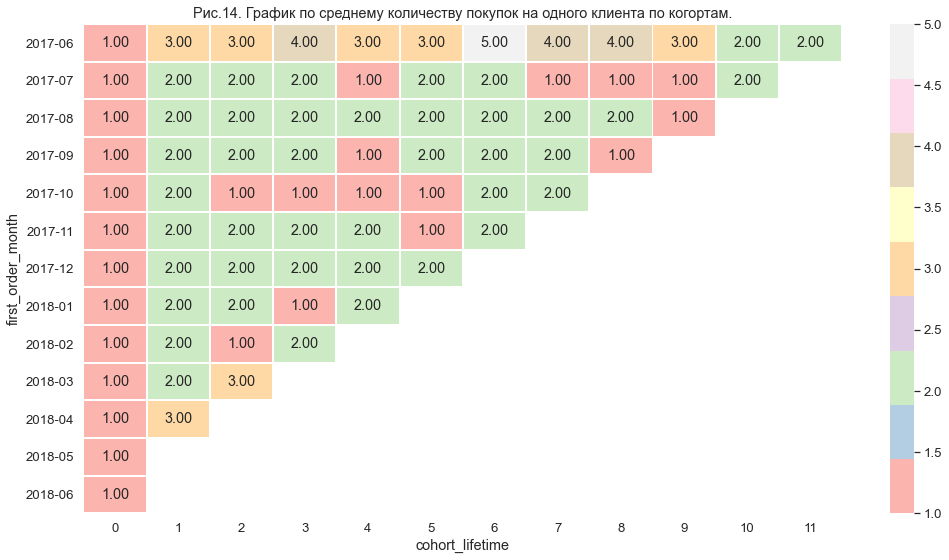

In [79]:
# Cоздадим сводную таблицу с когортным анализом количества заказов на пользователя. 
cohorts = orders_grouped_by_cohorts.pivot_table(index = 'first_order_month', 
                                                columns = 'cohort_lifetime', 
                                                values = 'orders_per_user', 
                                                aggfunc = 'mean')
#cohorts['mean'] = cohorts.mean(axis=1)

# Построим тепловую карту Seaborn. 
plt.figure(figsize=(17, 9))
plt.title('Рис.14. График по среднему количеству покупок на одного клиента по когортам.')
sns.heatmap(cohorts.round(), annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap='Pastel1')
cohorts

In [80]:
# Рассчитайла среднее количество покупок на одного клиента за 6 месяцев.
m6_cohorts_lifetime = cohorts[[0, 1, 2, 3, 4, 5]].head(7)
print('Среднее кол-во покупок на 1го пользователя за 6 м.: {:.2f} покупки'.format(m6_cohorts_lifetime[[5]][5].mean()))

Среднее кол-во покупок на 1го пользователя за 6 м.: 1.91 покупки


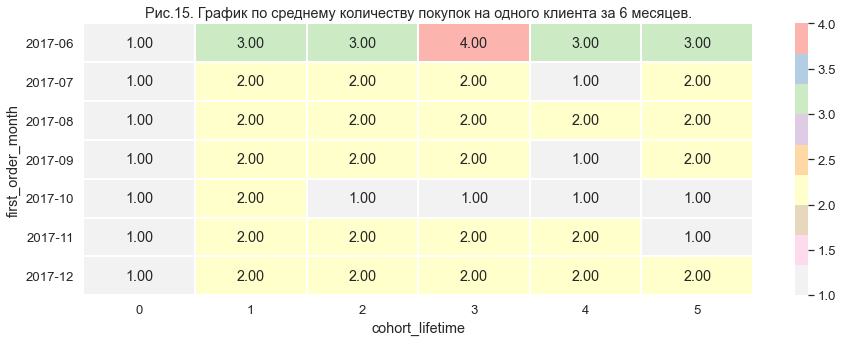

In [81]:
# Построим тепловую карту Seaborn. 
plt.figure(figsize=(15, 5))
sns.heatmap(m6_cohorts_lifetime.round(), annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap='Pastel1_r')
plt.title('Рис.15. График по среднему количеству покупок на одного клиента за 6 месяцев.')
plt.yticks(rotation = 0)
plt.show()

#### Выводы

Теперь видно как изменяется среднее количество покупок на одного пользователя в зависимости от месяца и когорты.
В некоторых когортах среднее количество покупок на одного пользователя растёт с течением времени. 

B июне в среднем каждый пользователь сделал 3 покупки в месяц, у нее лучшие показатели даже спустя год. Клиенты декабрьской когорты покупают хуже, в среднем каждый пользователь сделал 1 покупку в месяц. Также видим, что меньше всего покупок делается в октябре, несмотря на то, что количество визитов на сайт в этом месяце больше чем в июне.

Среднее количество покупок за 6 месяцев после первой покупки составляет 2 покупки на клиента. 

#### 2.2.3. Рассчитайте среднюю выручку с пользователя. Покажите, как меняется эта метрика с течением времени;

In [82]:
# Построим таблицу с заказами.
orders.head()

,uid,order_ts,revenue,first_session_ts,first_order_ts,first_session_month,first_order_month,order_month,cohort_lifetime
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:09:00,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01,0
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:14:00,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,0
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:25:00,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01,0
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:14:00,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01,0
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:31:00,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01,0


In [83]:
# Cредняя выручка с пользователя.
revenue_mean = orders['revenue'].mean()
print('Cредняя выручка с пользователя: {:.2f} y.e.'.format(revenue_mean))

Cредняя выручка с пользователя: 5.00 y.e.


In [84]:
# Применим когортный анализ. 
orders['order_month'] = orders['order_month'].dt.strftime('%Y-%m')
orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m')

# Сгруппируем данные по когорте first_order_month и месяцу жизни когорты.
orders_grouped_by_cohorts_r = orders.groupby(['first_order_month','cohort_lifetime']) \
                                    .agg({'revenue':'sum','uid':'nunique'}).reset_index()

# Найдём средний чек покупателя revenue_per_user — разделим показатель revenue на uid.
orders_grouped_by_cohorts_r['revenue_per_user'] = orders_grouped_by_cohorts_r['revenue'] / orders_grouped_by_cohorts_r['uid']
orders_grouped_by_cohorts_r.tail()

,first_order_month,cohort_lifetime,revenue,uid,revenue_per_user
74,2018-03,2,1114.87,58,19.22
75,2018-04,0,10600.69,2274,4.66
76,2018-04,1,1209.92,69,17.54
77,2018-05,0,13925.76,2986,4.66
78,2018-06,0,3.42,1,3.42


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,mean
first_order_month,,,,,,,,,,,,,
2017-06,4.73,16.10,17.71,35.76,23.78,22.21,31.50,25.03,19.30,27.23,25.68,9.80,21.57
2017-07,6.01,12.40,21.04,10.79,6.94,7.90,6.42,6.99,7.38,12.86,11.51,nan,10.02
2017-08,5.28,11.15,11.85,12.18,16.92,12.14,9.62,12.61,21.07,8.31,nan,nan,12.11
2017-09,5.65,22.36,13.54,138.67,19.88,26.10,27.44,16.96,11.04,nan,nan,nan,31.29
2017-10,5.00,11.29,6.75,7.41,7.07,7.26,6.57,7.48,nan,nan,nan,nan,7.35
2017-11,5.16,7.36,6.79,12.51,7.54,4.58,7.56,nan,nan,nan,nan,nan,7.36
2017-12,4.74,7.82,39.37,48.14,27.43,23.52,nan,nan,nan,nan,nan,nan,25.17
2018-01,4.14,8.72,12.37,11.20,4.70,nan,nan,nan,nan,nan,nan,nan,8.22
2018-02,4.16,8.61,4.94,6.94,nan,nan,nan,nan,nan,nan,nan,nan,6.16


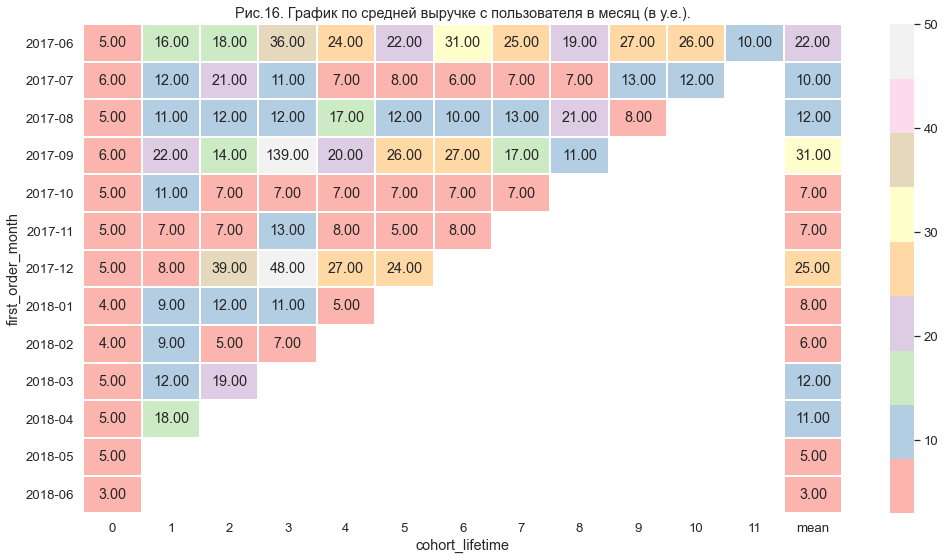

In [85]:
# Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, 
# как изменяется средний чек с течением времени:
cohorts_revenue_per_user = orders_grouped_by_cohorts_r.pivot_table(index='first_order_month', 
                                                                   columns='cohort_lifetime', 
                                                                   values='revenue_per_user', 
                                                                   aggfunc='mean')

cohorts_revenue_per_user['mean'] = cohorts_revenue_per_user.mean(axis=1)

# Построим тепловую карту Seaborn. 
plt.figure(figsize=(17, 9))
plt.title('Рис.16. График по средней выручке с пользователя в месяц (в у.е.).')
sns.heatmap(cohorts_revenue_per_user.round(), annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap='Pastel1', vmax=50)
cohorts_revenue_per_user

#### Выводы

Судя по когортному анализу-  видно в каких когортах средний чек пользователей возрастает на следующий месяц после месяца первой покупки. А в некоторых когортах средний чек стремительно растёт с течением времени. Например в когорте июня 2017, сентября 2017 и декабря 2017.

Во всех когортах на первый месяц lifetime, по сравнению с нулевой, средний чек пользователей возрастает. Это говорит, что **пользователи активнее всего покупают не сразу**, а по истечении некоторого времени, например, когда определятся куда именно хотят сходить, с кем сходить и что посмотреть. 

Самый высокий средний чек у сентябрьской когорты. Затем идут когорты июня и декабря 2017 года. 

Cредняя выручка с пользователя 5 y.e.

#### 2.2.3.1. Cредняя выручка с пользователя по устройствам.

In [86]:
# Посчитаем среднюю выручку с пользователя по устройствам.
visits_device = visits[['device', 'uid']] # расчетаем средний чек для устройств
orders_device = orders.merge(visits_device, on='uid') # добавим столбец с устройствами 
orders_device = orders_device.drop_duplicates(subset=['uid'], keep='last') # удалим дубликаты в 'uid'

# Расчитаем средний чек для desktop устройства. 
mean_check_desktop = orders_device.query('device == "desktop"').pivot_table(index='order_month', 
                                                                            values=['revenue', 'order_ts'], 
                                                                            aggfunc=['sum', 'count']).reset_index()
mean_check_desktop.columns = ['order_month', 'revenue', 'users', 'mean_rev']
mean_check_desktop['mean_rev'] = mean_check_desktop['revenue'] / mean_check_desktop['users']
print('Cредний чек для desktop устройства: {:.2f} y.e.'.format(mean_check_desktop['mean_rev'].mean()))

Cредний чек для desktop устройства: 4.14 y.e.


In [87]:
# Расчитаем средний чек для desktop устройства. 
mean_check_touch = orders_device.query('device == "touch"').pivot_table(index='order_month',
                                                                        values=['revenue', 'order_ts'], 
                                                                        aggfunc=['sum', 'count']).reset_index()
mean_check_touch.columns = ['order_month', 'revenue', 'users', 'mean_rev']
mean_check_touch['mean_rev'] = mean_check_touch['revenue'] / mean_check_touch['users']
print('Cредний чек для touch устройства: {:.2f} y.e.'.format(mean_check_touch['mean_rev'].mean()))

Cредний чек для touch устройства: 3.81 y.e.


#### Выводы

Cредняя выручка с пользователя по устройству desktop, 4,1 у.е., больше чем по touch устройству, 3,8 у.е. 

#### 2.2.4. Выясните, как меняется во времени накопительный LTV по когортам. Сравните средний LTV по когортам за 6 месяцев. Оценивайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

**LTV (от англ. lifetime value) — «пожизненная» ценность клиента**. Это итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок. При расчёте LTV обычно обращаются к валовой прибыли с клиента за период.

У нас есть данные о заказах и расходах Яндекс.Афиши. Также знаем, что маржинальность сервиса составляет 100%. Ознакомимся с информацией.

In [88]:
# Построим таблицу с заказами.
orders.head()

,uid,order_ts,revenue,first_session_ts,first_order_ts,first_session_month,first_order_month,order_month,cohort_lifetime
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:09:00,2017-06-01 00:10:00,2017-06-01,2017-06,2017-06,0
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:14:00,2017-06-01 00:25:00,2017-06-01,2017-06,2017-06,0
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:25:00,2017-06-01 00:27:00,2017-06-01,2017-06,2017-06,0
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:14:00,2017-06-01 00:29:00,2017-06-01,2017-06,2017-06,0
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:31:00,2017-06-01 07:58:00,2017-06-01,2017-06,2017-06,0


In [89]:
# Построим таблицу с расходами.
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [90]:
#  Выделим месяцы из дат в таблицах с расходами. 
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

In [91]:
# Посчитаем количество новых покупателей (buyers) за каждый месяц.
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'buyers']
cohort_sizes.head()

,first_order_month,buyers
0,2017-06,2022
1,2017-07,1922
2,2017-08,1369
3,2017-09,2579
4,2017-10,4340


In [92]:
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку.
# Сбросим индекс методом reset_index().
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58


Строка таблицы cohorts показывает какую выручку принесла когорта. Например строка 0 сообщает, что покупатели, сделавшие свой первый заказ в июне 2017 года, в этом же месяце принесли суммарно 9557,49 у.е. выручки.
С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество пользователей.

In [93]:
# Добавим в таблицу cohorts данные о том, сколько пользователей первый раз совершили покупку в каждый месяц.
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,buyers,order_month,revenue
0,2017-06,2022,2017-06,9557.49
1,2017-06,2022,2017-07,981.82
2,2017-06,2022,2017-08,885.34
3,2017-06,2022,2017-09,1931.30
4,2017-06,2022,2017-10,2068.58


Ранее в таблице появился столбец с новыми покупателями — buyers. В первых 5 строках его значение не изменяется — ведь это продажи одной и той же когорты.

In [94]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_order_month  79 non-null     object 
 1   buyers             79 non-null     int64  
 2   order_month        79 non-null     object 
 3   revenue            79 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


In [95]:
 # Заменим тип данных на datetime
report['first_order_month'] = pd.to_datetime(report['first_order_month'], format = '%Y-%m-%d %H:%M:%S') 
report['order_month'] = pd.to_datetime(report['order_month'], format = '%Y-%m-%d %H:%M:%S') 

In [96]:
# До расчёта LTV осталось 2 шага. 
# Во-первых, LTV считают не из выручки, а из валовой прибыли. 
# Значит, нужно найти валовую прибыль, умножив выручку на маржинальность.
# Во-вторых, LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, 
# где в столбцах — не месяц заказа, а возраст (age) когорты.
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,buyers,order_month,revenue,gp,age
0,2017-06-01,2022,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2022,2017-07-01,981.82,981.82,1
2,2017-06-01,2022,2017-08-01,885.34,885.34,2
3,2017-06-01,2022,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2022,2017-10-01,2068.58,2068.58,4


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.73,0.49,0.44,0.96,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,nan
2017-08,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,nan,nan
2017-09,5.65,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,nan,nan,nan
2017-10,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,nan,nan,nan,nan
2017-11,5.16,0.40,0.20,0.33,0.15,0.05,0.12,nan,nan,nan,nan,nan
2017-12,4.74,0.26,0.93,1.07,0.31,0.34,nan,nan,nan,nan,nan,nan
2018-01,4.14,0.29,0.30,0.14,0.06,nan,nan,nan,nan,nan,nan,nan
2018-02,4.16,0.28,0.08,0.07,nan,nan,nan,nan,nan,nan,nan,nan


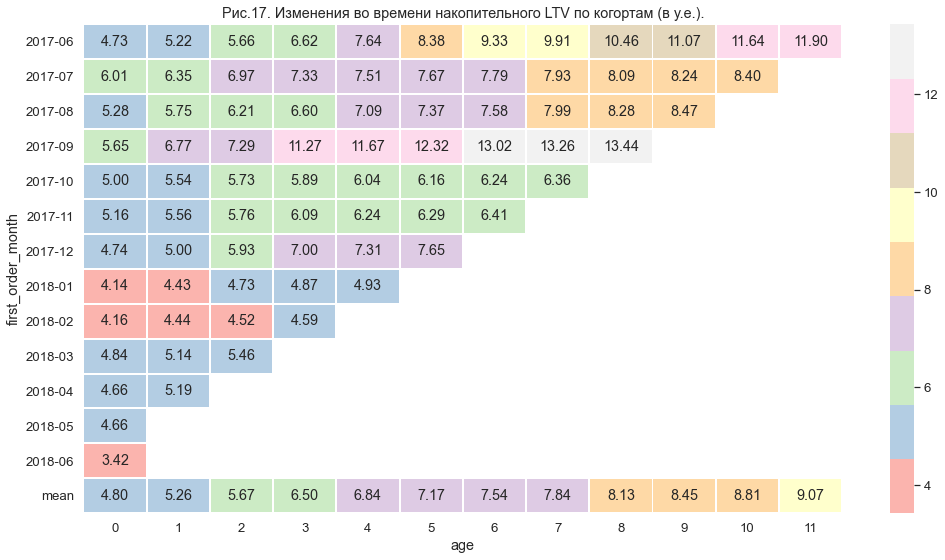

In [97]:
# Найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число новых покупателей в каждой когорте.
report['ltv'] = report['gp'] / report['buyers'] # LTV когорт
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m')
result = report.pivot_table(index='first_order_month', 
                            columns='age', 
                            values='ltv', 
                            aggfunc='mean').round(2)

# добавим строчку со средним LTV по сроку жизни среди всех когорт
result.loc['mean'] = result.mean()

# Построим тепловую карту Seaborn. 
plt.figure(figsize=(17, 9))
plt.title('Рис.17. Изменения во времени накопительного LTV по когортам (в у.е.).')
sns.heatmap(result.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap='Pastel1')

result

#### Выводы

По когортному отчёту накопительный LTV по когортам стремительно растёт с течением времени. Во всех когортах на первый месяц lifetime, по сравнению с нулевой, накопительный LTV пользователей возрастает. Самый высокий у когорты сентября 2017 и июня 2017 года. 

### 2.3. Маркетинговые метрики.<a name='step23'></a>

#### 2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам и как меняется это распределение во времени;

In [98]:
# Построим таблицу с расходами.
costs.head()

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [99]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

In [100]:
# Посчитаем общую сумму расходов на маркетинг.
total_costs = costs['costs'].sum()
print('Общая сумма расходов на маркетинг: {} y.e.'.format(int(total_costs)))

Общая сумма расходов на маркетинг: 329131 y.e.


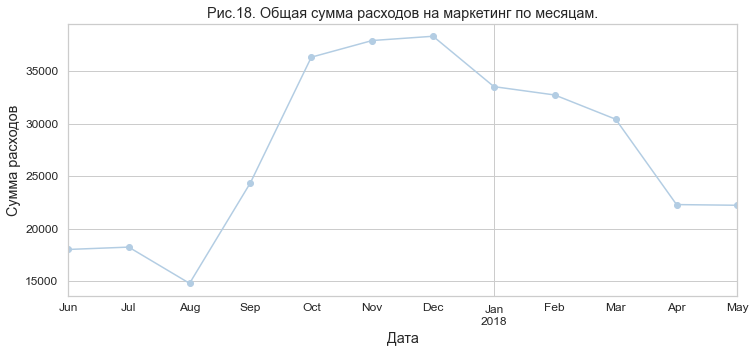

In [101]:
# Посчитаем общую сумму расходов на маркетинг по месяцам.
costs_sum_pivot = costs.pivot_table(index = 'cost_month', 
                                    values = 'costs', 
                                    aggfunc = 'sum')

costs_sum_pivot.plot(marker='o', figsize=(12,5), grid=True, legend=False, 
                     title='Рис.18. Общая сумма расходов на маркетинг по месяцам.', fontsize=12, color='#b3cde3')
plt.xlabel('Дата')
plt.ylabel('Сумма расходов')
plt.show()

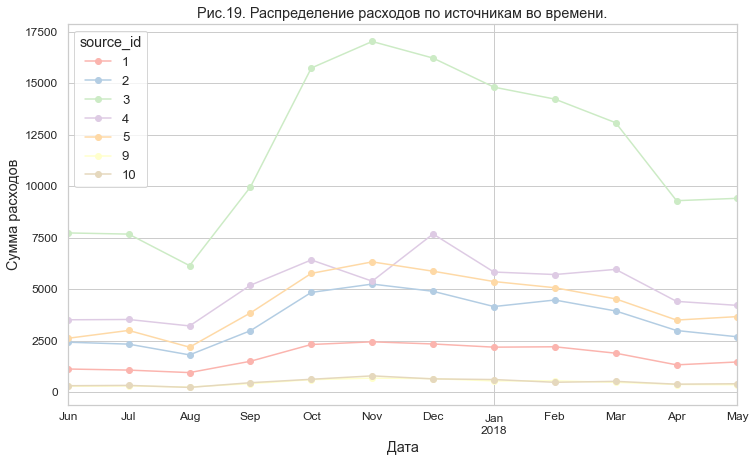

In [102]:
# Посчитаем как траты распределены по источникам и как меняется это распределение во времени.
costs_source_pivot = costs.pivot_table(index = 'cost_month',
                                       columns = 'source_id',
                                       values = 'costs', 
                                       aggfunc = 'sum')

costs_source_pivot.plot(marker='o', figsize=(12,7), grid=True, legend=True, 
                        title='Рис.19. Распределение расходов по источникам во времени.', fontsize=12)
plt.xlabel('Дата')
plt.ylabel('Сумма расходов')
plt.show()

#### Выводы

Общая сумма расходов на маркетинг.: 329131 y.e.

Судя по затратам по источникам маркетологи больше всего вложились в 3й источник, он самый затратный. Им стоит обратить внимание на источники привлечения 1, 9 и 10, они менее затратные для компании.

#### 2.3.2. Рассчитайте CAC. Определите, сколько стоит привлечение одного покупателя из каждого источника трафика;

**CAC (от англ. customer acquisition cost) — стоимость привлечения клиента.** Сумма денег, во сколько обходится новый клиент компании. Экономика одного покупателя сходится, если LTV больше CAC.

Найдем САС путем деления расходов из одого рекламного источника на число новых покупателей, пришедших из этого рекламного источника. Первоначально посчитаем CAC по рекламным источникам.

In [103]:
# Расходы по источникам.
costs_source = costs.pivot_table(index='source_id', values = 'costs', aggfunc = 'sum').reset_index()
costs_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [104]:
# Считаем кол-во новых покупателей по источникам.
first_source_per_user = visits.groupby('uid').agg({'source_id': 'first'})
buyers_per_source = orders.merge(first_source_per_user, on='uid')
buyers_per_source = buyers_per_source.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
buyers_per_source = buyers_per_source.rename(columns={'uid':'buyers'})
buyers_per_source

,source_id,buyers
0,1,3740
1,2,4320
2,3,9134
3,4,9822
4,5,6838
5,7,1
6,9,1415
7,10,1239


In [105]:
# Добавим кол-во новых покупателей по источникам в когортный отчет.
report_new = pd.merge(costs_source, buyers_per_source, on='source_id')
# Посчитем CAC.
report_new['cac'] = (report_new['costs'] / report_new['buyers'])

In [106]:
cac_mean = report_new['cac'].mean()
print('Средний CAC: {:.2f} y.e.'.format(cac_mean))

Средний CAC: 7.62 y.e.


,source_id,costs,buyers,cac
0,1,20833.27,3740,5.57
1,2,42806.04,4320,9.91
2,3,141321.63,9134,15.47
3,4,61073.60,9822,6.22
4,5,51757.10,6838,7.57
5,9,5517.49,1415,3.90
6,10,5822.49,1239,4.70


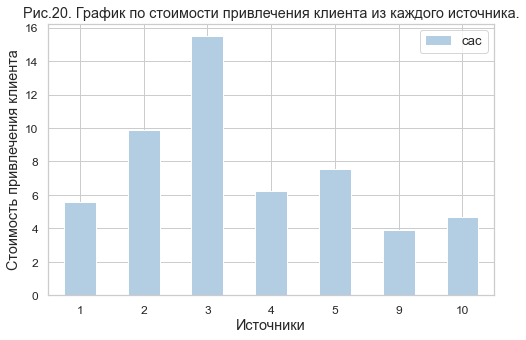

In [107]:
report_new.plot(kind='bar', x='source_id', y='cac', color='#b3cde3', figsize=(8,5), rot='0',
                fontsize=12, title='Рис.20. График по стоимости привлечения клиента из каждого источника.')
plt.xlabel('Источники')
plt.ylabel('Стоимость привлечения клиента') 
report_new

#### Выводы

Привлечение одного покупателя в среднем обошлось компании в 7,62 y.e. 

По графику по источникам видим, что маркетологи больше всего вложились в 3й источник - он самый затратный, необходимо рассмотреть более дешевые источники привлечения такие как 10, 9 и 1 - они менее затратные для компании. 

#### 2.3.3. Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт.

**ROMI (от англ. return on marketing investments, «возврат на маркетинговые инвестиции»).** Чтобы его рассчитать поделим LTV на CAC. 

ROMI рекламной кампании (%) = Валовая прибыль из этой кампании / Затраты

Чтобы посчитать накопительный ROMI, вызовем метод cumsum() (от англ. cumulative sum, «накапливаемая сумма»).

In [108]:
 # Заменим тип данных на datetime.
report['first_order_month'] = pd.to_datetime(report['first_order_month'], format = '%Y-%m-%d %H:%M:%S') 

# Посчитаем помесячные расходы.
monthly_costs = costs.pivot_table(index='cost_month',values='costs',aggfunc='sum').reset_index() 

# Добавим помесячные расходы в когортный отчет.
report_final = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='cost_month') 
report_final['cac'] = report_final['costs'] / report_final['buyers'] # посчитаем CAC
report_final['romi'] = report_final['ltv'] / report_final['cac'] # посчитаем ROMI

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.05,0.05,0.11,0.11,0.08,0.11,0.07,0.06,0.07,0.06,0.03
2017-07,0.63,0.04,0.07,0.04,0.02,0.02,0.01,0.01,0.02,0.02,0.02,nan
2017-08,0.49,0.04,0.04,0.04,0.05,0.03,0.02,0.04,0.03,0.02,nan,nan
2017-09,0.60,0.12,0.06,0.42,0.04,0.07,0.07,0.03,0.02,nan,nan,nan
2017-10,0.60,0.06,0.02,0.02,0.02,0.01,0.01,0.01,nan,nan,nan,nan
2017-11,0.56,0.04,0.02,0.03,0.02,0.01,0.01,nan,nan,nan,nan,nan
2017-12,0.54,0.03,0.11,0.12,0.04,0.04,nan,nan,nan,nan,nan,nan
2018-01,0.42,0.03,0.03,0.01,0.01,nan,nan,nan,nan,nan,nan,nan
2018-02,0.46,0.03,0.01,0.01,nan,nan,nan,nan,nan,nan,nan,nan


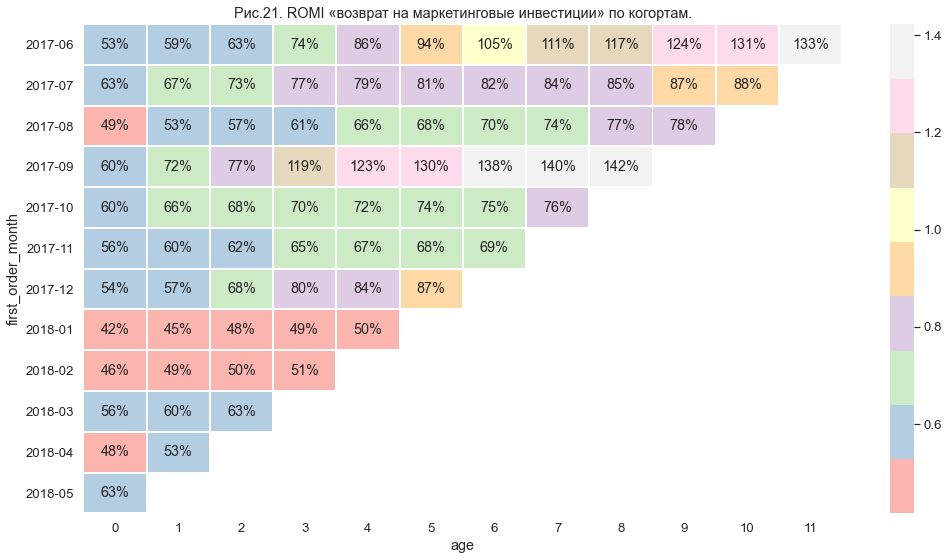

In [109]:
report_final['first_order_month'] = report_final['first_order_month'].dt.strftime('%Y-%m')

output = report_final.pivot_table(index='first_order_month', 
                                columns='age',
                                values='romi',
                                aggfunc='mean')

# Построим тепловую карту Seaborn.
plt.figure(figsize=(17, 9))
plt.title('Рис.21. ROMI «возврат на маркетинговые инвестиции» по когортам.')
sns.heatmap(output.cumsum(axis=1), # выведим накопительнй ROMI
            annot=True, fmt='.0%', linewidths=1, linecolor='white', cmap='Pastel1')
output

In [110]:
# Усредним значения по каждой колонки и «сложим» таблицу в единую строку.
output.iloc[:, :9].cumsum(axis=1).mean(axis=0).round(2)

age
0   0.54
1   0.58
2   0.63
3   0.72
4   0.78
5   0.86
6   0.90
7   0.97
8   1.05
dtype: float64

In [111]:
# Примем за 6 месяцев жизненный цикл и найдем среднее значение LTV.
ltv_mean = result.iloc[:7, :6]
ltv_mean.loc[:, 'ltv_sum'] = ltv_mean.sum(axis=1)
print('Средний LTV за 6 месяцев: {:.2f} y.e.'.format(ltv_mean['ltv_sum'].mean()))

Средний LTV за 6 месяцев: 7.98 y.e.


In [112]:
# Рассчитаем ROMI по источникам.
report_new['ltv_mean'] = 7.98
report_new['romi'] = (report_new['ltv_mean'] / report_new['cac']).round(2)

,source_id,costs,buyers,cac,ltv_mean,romi
5,9,5517.49,1415,3.90,7.98,2.05
6,10,5822.49,1239,4.70,7.98,1.70
0,1,20833.27,3740,5.57,7.98,1.43
3,4,61073.60,9822,6.22,7.98,1.28
4,5,51757.10,6838,7.57,7.98,1.05
1,2,42806.04,4320,9.91,7.98,0.81
2,3,141321.63,9134,15.47,7.98,0.52


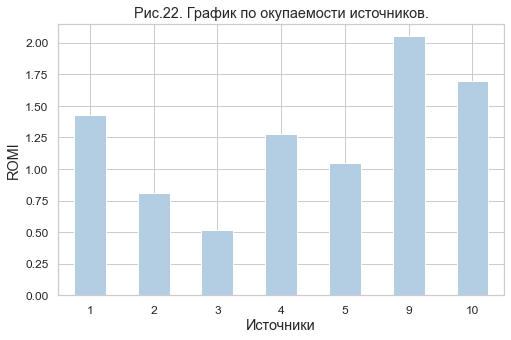

In [113]:
report_new.plot(kind='bar', x='source_id', y='romi', color='#b3cde3', figsize=(8,5), rot='0', grid=True, legend=False, 
                fontsize=12, title='Рис.22. График по окупаемости источников.')
plt.xlabel('Источники')
plt.ylabel('ROMI')
report_new.sort_values(by='romi', ascending=False)

#### Выводы

К сожалению, по когортному отчёту, затраты на маркетинг окупились только в когортах июня 2017, на 6-ой месяц, и сентября 2017, на 3-ий месяц. 

Чтобы вложения в маркетинг окупились за 6 месяцев, привлечение одного покупателя не должно превышать 7,98 у.е. 

Судя по графику по окупаемости источников видно, что в среднем когорты окупаются к концу 8 месяца. Самыми окупаемыми источниками - 1, 9 и 10.

## Шаг 3. Общие выводы и рекомендации

Подводя итоги, по результатам исследовательского анализа данных:

Получили количество уникальных пользователей в день, в неделю и в месяц:
 - DAU = 907 пользователей
 - WAU = 5716 пользователей
 - MAU = 23228 пользователей

`Среднее кол-во уникальных пользователей за месяц 23228 человек` это хорошая цифра, однако по метрике "sticky factor" (липкому фактору) показатели невысокие, очевидно, что `к сервису обращаются нечасто`.

Судя по количеству уникальных пользователей по устройствам, `с устройства desktop заходят чаще чем с устройства touch`, почти в три раза. Возможно это связано с удобствами данного устройства для совершения заказов. Необходимо изучить удобство использования сервиса на touch устройствах, что с ним не так.

Исходя из полученных графиков, `с августа месяца по ноябрь виден рост активности пользователей` - пик приходится на 24 ноября 2017 года. Заметно снижение активности с конца ноября до конца мая 2018 года. `Наблюдается сезонность` - активность пользователей зависит от времени года.

`В среднем пользователи посещают сайт 987 раз за день` и, судя по графику, количество визитов на сайт в день возрастает с августа по ноябрь, далее идет спад. Для этого они используют больше настольный компьютер, чем другое устройство.

`Сессия длится в среднем 60 секунд`. Если пользователь успевает за это время сделать заказ, то всё хорошо, а если нет — нужно проверить что не так. Статистические показатели по длительности одной сессии:
 - Среднее значение - 10 минут (643,51/60)
 - Медиана - 5 минут (300/60)
 - Мода - 1 минута (60/60)

Надо отметить, что показатели `коэффициента удержания, очень низкие`. Retention Rate на второй месяц падает больше, чем на 90%, для каждой когорты убывает с течением времени. `Самый высокий процент удержания у сентябрьской когорты`, также в ноябре для всех когорт наблюдается небольшое повышение процента вернувшихся пользователей. Но, в основном, `пользователи возвращаются редко`. Если для когорты пользователей, пришедших в июне 2017 года Retention Rate в первый месяц, составляет 7,87%, то для пользователей, пришедших в декабре 2017 года уже 5,58%. Так, за 6 месяцев коэффициент удержания упал на 2,29%. Это говорит, что `с каждой новой когортой поведение покупателей меняется`. Возможно были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.

С момента первого посещения сайта до совершения покупки проходит:
 - В среднем: 4 часа ((14949/60)/60)
 - Медиана: 16 минут (960/60)
 - Мода: 1 минута
Можно сказать, что `большинство заказов совершаются в первые минуты от начала первой сессии`. 50 % первых заказов совершаются в течении 16 минут и 75% в течении 4 часов, от начала первой сессии.

По когортному анализу в некоторых когортах среднее количество покупок на одного пользователя растёт с течением времени. B когорте июня 2017 в среднем каждый пользователь сделал 3 покупки в месяц, у нее лучшие показатели даже спустя год. Клиенты декабрьской когорты покупают хуже, в среднем каждый пользователь сделал 1 покупку в месяц. Также видим, что, меньше всего покупок делается в октябре, несмотря на то, что количество визитов на сайт в этом месяце больше чем в июне. `Среднее количество покупок за 6 месяцев после первой покупки составляет 2 покупи на клиента`.

По когортному отчёту видно в каких когортах `средний чек пользователей возрастает на следующий месяц после месяца первой покупки`. А в некоторых когортах средний чек стремительно растёт с течением времени. Например, в когорте июня 2017, сентября 2017 и декабря 2017. Во всех когортах на первый месяц lifetime, по сравнению с нулевой, средний чек пользователей возрастает. Это говорит, что `пользователи активнее всего покупают не сразу, а по истечении некоторого времени`, например, возможно, когда определяться куда именно хотят сходить, с кем сходить и что посмотреть. `Самый высокий средний чек у сентябрьской когорты`. Затем идут когорты июня и декабря 2017 года. `Средняя выручка с пользователя 5 y.e.` Cредняя выручка с пользователя по устройству desktop, в 4,1 у.е., больше чем по touch устройству, 3,8 у.е.

Накопительный LTV по когортам стремительно растёт с течением времени. Во всех когортах на первый месяц lifetime, по сравнению с нулевой, накопительный LTV пользователей возрастает. `Самый высокий LTV у когорты сентября 2017` и июня 2017 года.

Общая сумма расходов на маркетинг составляет 329131 y.e. По графику по источникам видим, что маркетологи больше всего вложились в 3й источник, он самый затратный. Маркетологам стоит обратить внимание на `источники привлечения 1, 9 и 10, они менее затратные для компании и самые окупаемые`.

`Привлечение одного покупателя в среднем обошлось компании в 7,62 y.e`. Валовая прибыль с каждого из них: 7,98 y.e. LTV > CAC. Экономика сходится.

К сожалению, судя по отчету, `затраты на маркетинг окупились только в когортах июня 2017, на 6-ой месяц, и сентября 2017, на 3-ий месяц`. Чтобы вложения в маркетинг окупились за 6 месяцев, привлечение одного покупателя не должно превышать 7 у.е. Судя по графику по окупаеомсти источников видно, что в среднем когорты окупаются к концу 8 месяца.

**Рекомендации маркетологам**: 

 - У пользователей необходимо `формировать привычку заходить на сайт почаще` так, чтобы сервис стал частью ежедневной рутины. Действия пользователей должны происходить часто и результат действия должен приносить удовлетворение. 

 - Нужно `обратить внимание на поведение когорты сентября 2017 года` - у них самый высокий средний чек и самый высокий процент удержания. Возможно данное поведение когорты является следствием именно особенностей рекламной компании.

 - Чтобы вложения в маркетинг окупились за 6 месяцев, `привлечение одного покупателя не должно превышать 7 у.е. Сделать так,  чтобы LTV > CAC`, тогда у сервиса будут оставаться деньги.

 - Также необходимо `рассмотреть более дешевые источники привлечения такие как 10, 9 и 1` - они самые окупаемые источники.
 - Необходимо `изучить удобство использования сервиса на touch устройствах, что с ним не так`.